In [35]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [3]:
# Cargar el dataset
data = pd.read_csv('clientes.csv')

In [5]:
# Mostrar las primeras filas del dataset y la información básica
print("Ejemplo de datos:")
print(data.head())

Ejemplo de datos:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [7]:
print("\nInformación del dataset:")
print(data.info())


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [9]:
# Seleccionar las características para el clustering (en este caso, sólo utilizaré 'Annual Income' y 'Spending Score')
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [11]:
# Normalizar los datos para mejorar el rendimiento de K-means
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
# Definir el rango de k para el método del codo
k_range = range(2, 11)
sse = []

In [15]:
# Entrenar modelos K-means para diferentes valores de k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

C:\Users\deyvi.caicedo\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\deyvi.caicedo\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\deyvi.caicedo\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\deyvi.caicedo\AppData\Local\anaconda3\Lib\site-packages\sklea

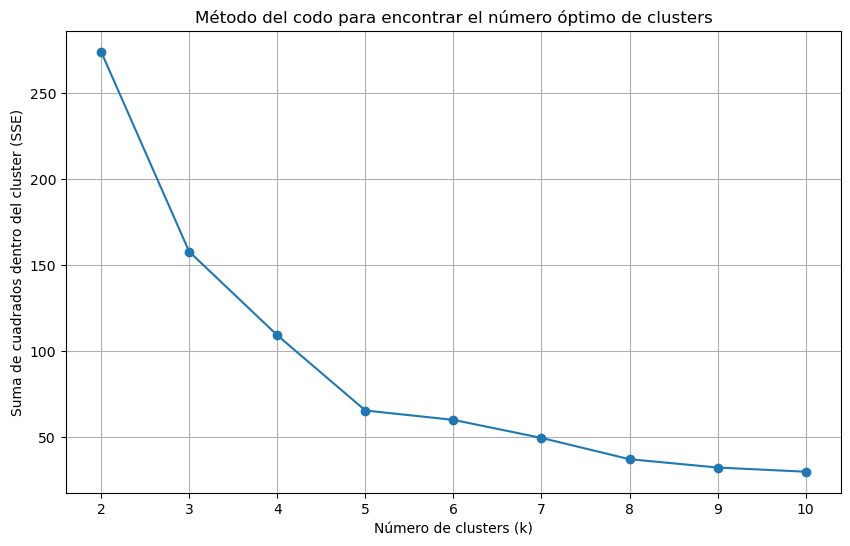

In [17]:
# Graficar el método del codo para encontrar el número óptimo de clusters (k)
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Suma de cuadrados dentro del cluster (SSE)')
plt.title('Método del codo para encontrar el número óptimo de clusters')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [19]:
# Seleccionar el número óptimo de clusters
optimal_k = 5  # Este valor puede ajustarse según el método del codo o conocimiento del dominio

In [21]:
# Entrenar el modelo K-means con el número óptimo de clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)
cluster_labels = kmeans.labels_

C:\Users\deyvi.caicedo\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [23]:
# Calcular el coeficiente de silueta para evaluar la calidad del clustering
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print(f'Coeficiente de silueta medio para {optimal_k} clusters:', silhouette_avg)

Coeficiente de silueta medio para 5 clusters: 0.5546571631111091


In [25]:
# Calcular y graficar el coeficiente de silueta para cada muestra
sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)

C:\Users\deyvi.caicedo\AppData\Local\Temp\ipykernel_10492\3133792646.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color = plt.cm.get_cmap('tab10')(float(i) / optimal_k)


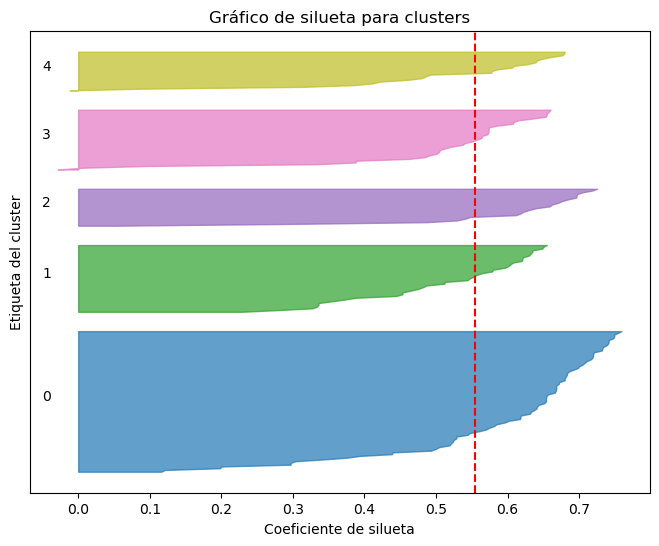

In [27]:
plt.figure(figsize=(8, 6))
y_lower = 10
for i in range(optimal_k):
    cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    cluster_silhouette_values.sort()
    size_cluster_i = cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = plt.cm.get_cmap('tab10')(float(i) / optimal_k)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.title('Gráfico de silueta para clusters')
plt.xlabel('Coeficiente de silueta')
plt.ylabel('Etiqueta del cluster')
plt.axvline(x=silhouette_avg, color='red', linestyle='--')
plt.yticks([])
plt.show()

In [29]:
# Mostrar otras métricas de evaluación del clustering (por ejemplo, el índice Davies-Bouldin)
db_score = metrics.davies_bouldin_score(X_scaled, cluster_labels)
print(f'Índice Davies-Bouldin:', db_score)

Índice Davies-Bouldin: 0.5722356162263352


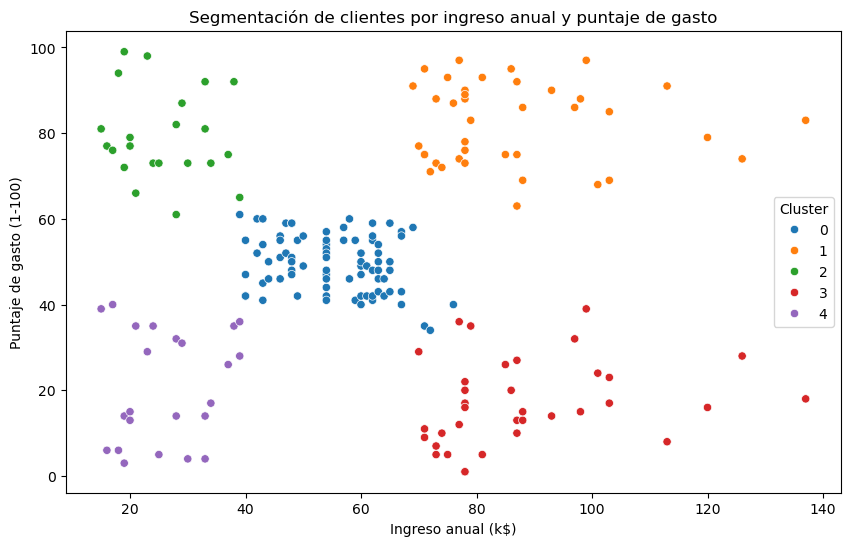

In [31]:
# Visualización de los clusters en el espacio de características reducido
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue=cluster_labels, palette='tab10', data=data)
plt.title('Segmentación de clientes por ingreso anual y puntaje de gasto')
plt.xlabel('Ingreso anual (k$)')
plt.ylabel('Puntaje de gasto (1-100)')
plt.legend(title='Cluster')
plt.show()